# DataCamp Certification Case Study

### Project Brief

Tasty Bytes , an online recipe startup, has hired you as a data scientist. The website features new recipes on the homepage every day. The owner has told you that on days that they feature a popular recipe, traffic increases by as much as 40%. However, it is difficult to predict in advance which recipes will be popular or not.

The data team has collected data from previously published recipes. The owner wants to know whether you can use this information to predict whether a recipe will be popular (or in other words, receive a high score). She is especially interested in preventing unpopular (low-scoring) recipes from appearing on the homepage. She estimates that of all unpopular recipes, they currently correctly categorize 75% of them as being unpopular. She wants to know how your solution would compare to this guessing approach.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the owner in a 10 minute presentation. The owner has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/recipes.csv"`

## Technical Summary
In the course of the analysis, the following actions were taken:</p>
1. **Data Importing and Cleaning.** The dataset was loaded and examined for missing values and matching data types. As a result, missing  and extremely large values were also found in the Calories feature. Missing values for this column have been dropped. Missing values for RecipeCategory have been replaced with a link to the recipe's name.</p></p>
2. **Exploratory Data Analysis.** The distributions of Contents –Calories, Cholesterol, Carbohydrates, Sugar, and Protein– across Popularity were examined. An appropriate logarithmic transformation was performed. In addition, we have created new features - Content per Serving, Content % Daily Value. We also looked at the amount of added Sugar in Carbohydrates, which helped us understand some of the consumer preferences. In addition, we have created dummy variables that include Top-Names and Top-Categories.</p></p>
3. **Classification Model Development.** Logistic Regression was taken for the basic model, which proved to be poor due to a mismatch with the client's requests. Initially, all features were included in the model; however, we determined the most important after establishing Random Forest. Customers didn't care about the calorie content, the inclusion of certain words in the name, or the commitment to a specific category. We simulated the resulting dataset with important features using KNN, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Voting Classifiers. A commitment was given to high values of true negatives and low values of false positives in the confusion_matrix. As a result, the KNN model was chosen, which was better performed according to these indicators, but the accuracy was not very high. Scaling brought no added value.</p></p>
4. **Best Model Development.** We implemented a hyperparameter using RandomizedSearch and determined the optimal parameter values for the KNN model. Precision was chosen as the primary target due to the case's specifics. For the client, the fact that a popular recipe will be displayed on the main page turned out to be more critical than an unpopular recipe can be popular. As a result, we injected the values into the final model and found that only 27% of the time, the model will incorrectly say that the recipe is popular. Since the company's current model reflects 75% accuracy, it is recommended to use both models for a weighted decision. It should be noted that the factors of sugar content in carbohydrates and protein content are the most important for buyers, which assumes adherence to a keto diet, which can be used for other Tasty Bytes decisions. In addition, a recommendation was made to investigate other factors, such as photo quality, prices, etc., since the composition of the recipe turned out not to be such a determining factor for the consumer.

## 1. Data Importing and Cleaning
### 1.1 Data and packages/libraries loading
First, we need to start by importing the packages and libraries required when reviewing the data and conducting exploratory data analysis. Libraries and packages needed to create machine learning models were instantiated to this section later during the examination.</p>
Secondly, we need to load the dataset in the <em>csv.</em> format directly. In the documentation, ten columns of the dataset were presented with the corresponding description, including data types and metrics. Since the data is labeled and based on the case statement presented by Tasty Bytes, we can say that we are dealing with a Supervised Learning problem.

In [ ]:
# Importing libraries / packages

import pandas as pd  				#data science essentials
import numpy as np   				#mathematical essentials
import matplotlib.pyplot as plt 	#fundamental data visualization
import seaborn as sns 				#enhanced visualization
import statistics 					#statistical tools
import random   					#generating pseudo-random number

from collections import Counter    										#counting objects (text-analysis)

from sklearn.linear_model import LogisticRegression 					#Logistic Regression
from sklearn.ensemble import RandomForestClassifier 					#Random Forest for a Classification problem
from sklearn.tree import DecisionTreeClassifier 					 	#Decision Tree for a Classification problem
from sklearn.neighbors import KNeighborsClassifier as KNN 				#KNeighbors Classifier
from sklearn.ensemble import GradientBoostingClassifier as GBC 			#Gradient Boosting Classifier
from sklearn.ensemble import VotingClassifier 							#Voting Classifier
from sklearn.model_selection import RandomizedSearchCV 					#Hyperparameter tunning

from sklearn.model_selection import train_test_split 					#Splitting dataset into training/testing sets
from sklearn.pipeline import Pipeline 									#Pipelinning
from sklearn.preprocessing import StandardScaler 						#Features Scaling
from sklearn.metrics import confusion_matrix, classification_report 	#Evaluating tools for a Classification problem
from sklearn.metrics import roc_curve, roc_auc_score 					#Evaluating ROC Curve and ROC AUC score
from sklearn.metrics import mean_squared_error as MSE 					#Calculating Mean Squarred Error
from sklearn.model_selection import KFold 								#K-folds cross-validator

In [ ]:
# Importing data
file_path = "data/recipes.csv"
data = pd.read_csv(file_path)

# Displaying the first 5 rows of the dataset
data.head(n = 20)

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
5,328806,My Kids Breakfast Smoothie,Smoothies,313.4,42.7,42.1,17.0,11.7,2.0,1.0
6,375975,Moroccan Meatballs in Tomato Sauce,Lamb/Sheep,566.0,103.7,10.1,5.0,25.6,4.0,0.0
7,189787,Eggplant (Aubergine) and Tomato Crisp,Vegetable,151.5,5.5,15.1,6.4,5.1,8.0,1.0
8,424798,Very Berry Iced Tea,Beverages,4.0,0.0,0.9,0.3,0.1,8.0,1.0
9,17549,Burnished Bananas,Dessert,120.9,0.0,29.8,17.3,1.3,1.0,0.0


### 1.2 Inspecting Recipes
We can observe the columns of a dataset that contains numeric, <code>int64</code> and <code>float64</code>, and non-numeric formats, <code>object</code>. Based on the case documentation and the general knowledge response variable, the <code>HighScore</code> column shows the popularity of a particular recipe, where 1 is popular and 0 stands for unpopularity. The <code>float64</code> data type is wrong for the given column, presented by binary variables, which needs to be examined and replaced with <code>int64</code>. To do this, we will need to ensure that there are no incorrectly entered data or other errors.</p>
The first column represents keys, <code>RecipeId</code>, and therefore will not be used in the analysis due to lack of value since the identification number cannot explain the Recipe's popularity.</p>
Speaking of the rest of the features, it seems at first glance that <code>RecipeCategory</code> should be the <code>category</code> format, and <code>RecipeServings</code> should be an integer value unless the ½ serving option is present. This fact will also need to be investigated.
In addition, we examined the presence of missing values and found that at first glance, the <code>RecipeCategory</code> column contains 40 missing values, NaN.

In [ ]:
# Looking for a summary info of the dataset
data.info() #taking a glance for datatypes and missing values
data.isna().sum() #looking for a total # of missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeId             43092 non-null  int64  
 1   Name                 43092 non-null  object 
 2   RecipeCategory       43052 non-null  object 
 3   Calories             43092 non-null  float64
 4   CholesterolContent   43092 non-null  float64
 5   CarbohydrateContent  43092 non-null  float64
 6   SugarContent         43092 non-null  float64
 7   ProteinContent       43092 non-null  float64
 8   RecipeServings       43092 non-null  float64
 9   HighScore            43092 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


RecipeId                0
Name                    0
RecipeCategory         40
Calories                0
CholesterolContent      0
CarbohydrateContent     0
SugarContent            0
ProteinContent          0
RecipeServings          0
HighScore               0
dtype: int64

### 1.3 Descriptive Statistics
By conducting descriptive statistical analysis for numeric variables, several noteworthy points can be made:
- The maximum values of <code>Calories</code>, <code>CholesterolContent</code>, <code>CarbohydrateContent</code>, <code>SugarContent</code>, <code>ProteinContent</code>, and <code>RecipeServings</code> seem to be excessively high and well above the 75% percentile, which, in addition to a general understanding, statistically indicates outliers (more than (Q3 + 1.5*IQR) which stands for more than approximately 870 calories). The explanation for this fact, except being a mistake, is probably that the recipe suggests a meal for a large family and friends, say at Christmas, for example, turkey with apples. However, this fact will need to be considered and a decision made on what to do with these observations.</p></p>
- The minimum value in the <code>Calories</code> column seems suspicious since pure water is unlikely to be represented in the recipe. Most likely, these are erroneously entered values ​​that need to be either transformed or dropped.

In [ ]:
# Looking for a descriptive statistics of the dataset
data.describe()

,RecipeId,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
count,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000
mean,224707.928154,353.297587,69.475757,32.844187,12.206600,15.773125,9.517521,0.645735
std,141980.914350,405.065683,112.422309,46.428258,28.304371,21.588594,224.022873,0.478296
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,102616.750000,164.800000,4.500000,11.600000,2.200000,3.400000,4.000000,0.000000
50%,212333.000000,284.100000,40.700000,25.400000,5.500000,8.800000,6.000000,1.000000
75%,336736.250000,446.725000,95.900000,43.400000,14.100000,24.300000,8.000000,1.000000
max,540876.000000,30933.400000,9167.200000,3564.400000,2566.800000,1420.800000,32767.000000,1.000000


#### 1.3.1 RecipeCategory Investigation 
Examining the value_counts of the <code>RecipeCategory</code> column, we see generalized categories containing many recipes, such as <code>Dessert, Lunch/Snacks, One Dish Meal</code>, etc., and individual category names for example, <code>Mushroom Soup</code> or <code>Korean</code> with a single recipe, which makes further use of this data difficult. </p>
In total, 246 groups are presented for this feature, and the hypothesis that it is possible to apply the category transformation in dummy variables to explain the changes in the response variable is incorrect, at least for all groups of categories. However, the use of the top-10 categories can be considered.</p>
The format change to <code>category</code> will be done after the imputation of the missing values, which will make this procedure easier.

In [ ]:
# Checking for RecipeCategory
data['RecipeCategory'].describe
data['RecipeCategory'].value_counts().sort_values(ascending = False)
data['RecipeCategory'].value_counts(normalize = True).sort_values(ascending = False)

#data['RecipeCategory'] = data['RecipeCategory'].astype('category') #changing from object to category
#print(data.dtypes)

Dessert               0.097812
Lunch/Snacks          0.075978
One Dish Meal         0.067244
Vegetable             0.058000
Breakfast             0.045735
                        ...   
Welsh                 0.000023
Mushroom Soup         0.000023
Korean                0.000023
Pennsylvania Dutch    0.000023
Moose                 0.000023
Name: RecipeCategory, Length: 246, dtype: float64

#### 1.3.2 HighScore Investigation /response variable/
Examining the distribution of the response variable, <code>HighScore</code>, we can conclude that the data type was determined incorrectly; there are no abnormal values. The format has been changed to <code>int64</code>.</p>
Tasty Bytes has more popular dishes than unpopular ones. Based on customer requests and realizing that unpopular recipes on the home page lead to lower traffic and fewer orders, which is usually a critical moment for startups, it can be argued that identifying unpopular recipes is more important than identifying popular ones. This does not affect binary values or their transformation but may be necessary when considering the confusion matrix.

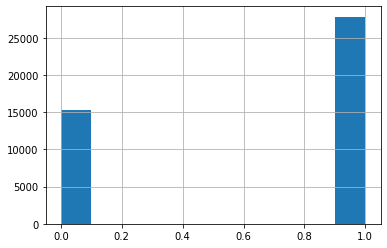

RecipeId                 int64
Name                    object
RecipeCategory          object
Calories               float64
CholesterolContent     float64
CarbohydrateContent    float64
SugarContent           float64
ProteinContent         float64
RecipeServings         float64
HighScore                int64
dtype: object


In [ ]:
# Checking for wrong imputed values in HighScore column
data['HighScore'].hist() #-- no reason for a float object
plt.show()

data['HighScore'] = data['HighScore'].astype('int') #changing data type from float64 to int64
print(data.dtypes) 			#checking the correctness of the changing

#### 1.3.3 RecipeServings Investigation
It was noted earlier that the <code>RecipeServings</code> data type was probably chosen incorrectly, and all values should be integers. We checked this using the equation, according to which if an integer value is subtracted from the original value, the remainder will be a decimal. If there is something other than zero in the remainder, such observations will be shown. No observations were shown. The supplementary column with integer values has been removed from the original dataset. Finally, the data format has been changed to <code>int64</code>.

In [ ]:
# Checking (and reasons for the float64 dtype) for RecipeServings
data['RecipeServings_int'] = data['RecipeServings'].astype('int') #creating a supplementary column
data[data['RecipeServings'] - data['RecipeServings_int'] != 0]  #x - int(x) != 0: if True => have reasons for float
data['RecipeServings'] = data['RecipeServings'].astype('int') #changing to int format
data = data.drop('RecipeServings_int', axis = 1) #dropping supplementary column
data.dtypes #checking the result

RecipeId                 int64
Name                    object
RecipeCategory          object
Calories               float64
CholesterolContent     float64
CarbohydrateContent    float64
SugarContent           float64
ProteinContent         float64
RecipeServings           int64
HighScore                int64
dtype: object

#### 1.3.4.1 Calories Investigation: low values
Studying the minimum calorie values, less than one calorie, it was found that these observations have no practical value for analysis since almost all values, except for Name, RecipeCategory, and <code>HighScore</code>, were equal to zero. This testifies to the error of the data points, which is confirmed by understanding dishes based on their names; for example, Pork Tenderloin is unlikely to have no calories or other contents.</p>
The percentage of these values in the entire dataset is 0.5%, from which we can drop these observations without losing value. Data values less than one calorie were replaced with missing values and then dropped.

In [ ]:
# Checking for suspiciously low values
data[data['Calories'] < 1]

# Checking for proportion in the dataset
print(round(data[data['Calories'] < 1].count()[0] / len(data) * 100, 1), "%")

# Replace Calories with 0 to NaN
data[data['Calories'] < 1] = np.NaN

# Checking the result
print(round(data[data['Calories'] < 1].count()[0] / len(data) * 100, 1), "%") # checking
print(data['Calories'].isna().sum()) #doublechecking

# Dropping missing values (no value - all except servings is zero)
data.dropna(axis = 0, subset = ['Calories'], inplace = True)

# Checking the result
print(data['Calories'].isna().sum()) #checking

0.5 %
0.0 %
216
0


#### 1.3.4.2 Calories Investigation: high values
We plotted to see how common it is for this startup to have recipes with unusually high-calorie values. A threshold of 10,000 calories was visually chosen to explore observations containing such high-calorie content.</p>
It turned out that these values are scarce, and a hypothesis arose about their erroneousness; however, a close relationship with high values of contents indicated the opposite since it is hard to make an error in the exact data for five features simultaneously.</p>
Despite this, two extreme observations with a calorie content above 20,000 were removed from the dataset.

0

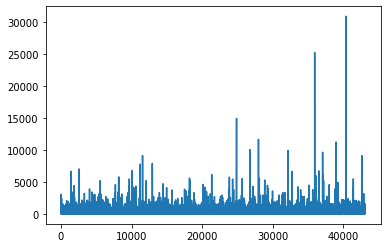

In [ ]:
# Checking for suspiciously high numbers
data['Calories'].plot()
data[data['Calories'] > 10000] # Hot Chocolate Dry

# Dropping
data[data['Calories'] > 20000] = np.NaN
data['Calories'].isna().sum() #checking
data.dropna(axis = 0, subset = ['Calories'], inplace = True)
data['Calories'].isna().sum() #checking

#### 1.3.5 RecipeCategory Investigation
Based on the characteristics of the <code>RecipeCategory</code>, the method of imputing missing values was founded on the <code>Name</code> column analysis. For example, a recipe name, <em>Chicken Salad</em> or <em>Chicken Pie</em>, is more likely to be categorized as <em>Chicken</em> than <em>Beverages</em> or <em>Dessert</em> category. This principle has been adopted.</p>
To do this, we first created a missing data subset containing 40 observations as a supplementary dataset for this procedure. Next, we split each recipe name into separate words, which were used to separate the original dataframe. Thus, we were able to get the most frequently occurring category from the resulting subset containing the original observations only using this word in each iteration of the loop.</p>
Accordingly, we got the mode of the category for each word subset. Next, we chose the most frequently occurring value for each row. For example, if <em>Chicken</em> was categorized as <em>"Chicken"</em>, <em>Alfredo</em> was categorized as <em>"Chicken"</em> as well, and <em>Salad</em> was classified as <em>"Vegetable"</em> in the recipe name <em>"Chicken Alfredo Salad"</em>, then the resulting category would be <em>"Chicken"</em>.
However, one name was not determined, and based on a request to Google about what this recipe is, and it was decided to attribute it to <em>Chicken Breast</em>.</p>
Finally, the data format of this feature has been changed to <code>category</code>. Analysis of duplicates showed that there were no identical observations.

In [ ]:
# Looking for Missing Values in RecipeCategory column
subset = data[data['RecipeCategory'].isna() == True]

df_categ = pd.DataFrame(index = np.arange(0,40), columns = np.arange(0,12)) #empty df

for i in range(len(subset['Name'])):
    txt_splitted = subset['Name'].iloc[i].split(' ')
     
    for num in range(len(txt_splitted)):
        try:
            subs = data[data['Name'].str.contains(txt_splitted[num])]
            mode = statistics.mode(subs['RecipeCategory'])
            df_categ.iloc[i, num] = mode
        except:
            pass
        
#Mode of modes    
df_categ['RecipeCategory'] = df_categ.mode(axis = 1, dropna = True)[0]
#df_categ['RecipeCategory'] = df_categ['RecipeCategory'].astype('category') #setting to the right format
#df_categ #checking


# Replacing missing values in a Head dataset with supplementary data
for i in range(len(subset)):
    subset.iloc[i, 2] = df_categ.iloc[i, 12]
    
data[data['RecipeCategory'].isna() == True] = subset #placing back

data.isna().sum() #checking
data[data['RecipeCategory'].isna() == True] #looking for last missing value

# Replacing the last missing value of 'Phoney Abalone' meal with 'Chicken Breast'
df_categ['RecipeCategory'].fillna("Chicken Breast", inplace = True)

#print(data.isna().sum()) #doublechecking

# Putting datacolumn to the right Category format
data['RecipeCategory'] = data['RecipeCategory'].astype('category')
data.dtypes

# Checking for duplicates
#data[data.duplicated() == True] #check for duplicates

RecipeId                float64
Name                     object
RecipeCategory         category
Calories                float64
CholesterolContent      float64
CarbohydrateContent     float64
SugarContent            float64
ProteinContent          float64
RecipeServings          float64
HighScore               float64
dtype: object

### 2. Exploratory Data Analysis and Feature Engineering
#### 2.1 Calories
The next step towards the formation of a Machine Learning Model based on the solution of the Supervised Learning Problem is Exploratory Data Analysis. First, it is necessary to understand the dependent variable; however, since it is expressed in binary values and we have already considered the distribution earlier, it does not make sense to consider this variable separately.</p>
In this regard, we began investigating one of the components - calories. Earlier, we have seen that the dataset has observations above 2000 calories, i.e., above the daily allowance. However, this dataframe also has a significant number of low-calorie recipes. This makes the distribution highly right-skewed.

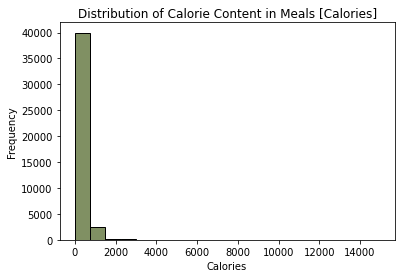

In [ ]:
# Discovering Calories feature
sns.histplot(x = data['Calories'], bins = 20, color = 'darkolivegreen')
plt.title("Distribution of Calorie Content in Meals [Calories]")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show() #! scewed too much

#### 2.1 Calories: log transformation
Because the distribution of values is heavily right-skewed, we created a new column in the original dataset containing log-transformed calorie values.</p>
Looking at the graph of the distribution of logarithmic calories, you can see the distribution similar to normal. It is probably better to use this indicator in a logarithmic form for further analysis and model building; however, this fact is inaccurate due to the relationship between other components.

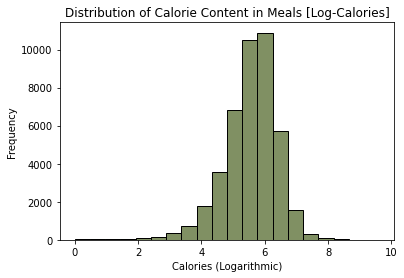

In [ ]:
# Log Transformation
data['Calories_log'] = np.log(data['Calories'])

#Plotting with transformed data
sns.histplot(x = data['Calories_log'], bins = 20, color = 'darkolivegreen')
plt.title("Distribution of Calorie Content in Meals [Log-Calories]")
plt.xlabel("Calories (Logarithmic)")
plt.ylabel("Frequency")
plt.show() 

#### 2.1 Calories across Popularity
Using logarithmic calorie distribution is helpful for estimating how different it is for recipes with high popularity, i.e., <code>HighScore == 1</code>, compared to recipes with low popularity, where <code>HighScore == 0</code>.</p>
With the help of <code>seaborn.histplot</code>, two distributions of logarithmic calories were presented on one graph in the context of the recipe's popularity. It can be seen that the median value of the distributions is at the same level, as well as the standard deviations. The fact that calories are presented in a larger count for popular recipes is simply because there are more popular recipes than unpopular ones in the original dataframe. This graph makes it difficult to conclude that this indicator will be significant for predicting the response variable since there is no visible variability.

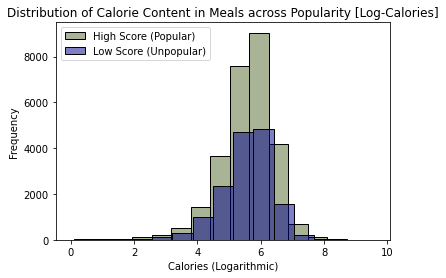

In [ ]:
# Looking for graph across different scores

# Plotting with transformed data
fig, ax = plt.subplots()

sns.histplot(x = 'Calories_log',
             data = data[data['HighScore'] == 1],
             bins = 15, 
             color = 'darkolivegreen',
             label = 'High Score (Popular)',
             alpha = 0.5)

sns.histplot(x = 'Calories_log',
             data = data[data['HighScore'] == 0],
             bins = 15, 
             color = 'darkblue',
             label = 'Low Score (Unpopular)',
             alpha = 0.5)

plt.title("Distribution of Calorie Content in Meals across Popularity [Log-Calories]")
plt.xlabel("Calories (Logarithmic)")
plt.ylabel("Frequency")
plt.legend()

plt.show() #! seems like popular meals contains the same amount of calories as well as unpopular

#### 2.2 Features Transformation
Since calories are related to the content of <code>Carbohydrate, Protein, Sugar</code> and <code>Cholesterol</code> in a meal, and also thanks to Descriptive Statistics, we can say that the right-skewed distributions will also be present, which is why it is necessary to transform these data logarithmically and insert them into new dataframe columns. This was done using list comprehensions because if some <code>Content</code> is null, there will be problems with the logarithmic transformation because the logarithm of zero is not defined.

In [ ]:
# Log transformation of features ## <- calories and contents are connected (descriptive statistics and general knowledge)! 
data['CholesterolContent_log'] = [np.log(i) if (i > 0) else 0 for i in data['CholesterolContent']]
data['CarbohydrateContent_log'] = [np.log(i) if (i > 0) else 0 for i in data['CarbohydrateContent']]
data['SugarContent_log'] = [np.log(i) if (i > 0) else 0 for i in data['SugarContent']]
data['ProteinContent_log'] = [np.log(i) if (i > 0) else 0 for i in data['ProteinContent']]

#### 2.2 Features Investigating across Popularity
Using subplots with two rows and two columns, we could show the distributions of the logarithmically expressed components of meals - <code>CholesterolContent, CarbohydrateContent, SugareContent</code>, and <code>ProteinContent</code>. Each subplot shows distributions across popular and unpopular recipes.</p>
Each distribution follows the pattern we saw in our calorie analysis, where the medians and standard deviations are in a very close range, indicating that the use of these variables alone is unlikely to be decisive in predicting the popularity of a recipe. In this regard, further feature engineering is needed.</p>
Speaking in more detail about the distribution of <code>Cholesterol</code>, it can be noted that a significant number of prescriptions do not contain this component, which is undoubtedly a positive thing for the health of customers. One can assume a sport and/or health-oriented startup policy due to the commitment to low-calorie recipes.</p>
The <code>Carbohydrate</code> and <code>Protein distributions</code> are slightly left-skewed, while the <code>Sugar Content</code> distribution is slightly right-skewed. Given that these components have been log-transformed, it can be concluded that the original sugar content is relatively low for most dishes. In contrast, the content of Carbohydrates and Proteins is moderately low, which is probably determined by the size of the corresponding portion.

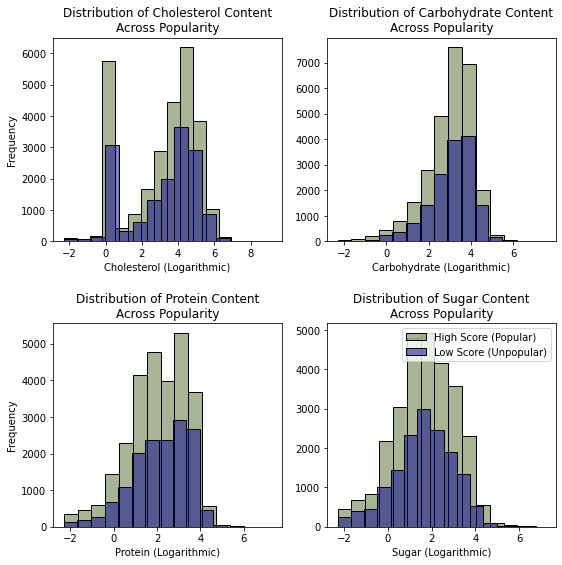

In [ ]:
# Creating a FacetGrid of Content distribution across Popularity (<-redo)
fig, axes = plt.subplots(2, 2, figsize = (9,9))
plt.subplots_adjust(hspace = 0.4)

sns.histplot(ax = axes[0,0], x = 'CholesterolContent_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0,0], x = 'CholesterolContent_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0,0].set_title("""Distribution of Cholesterol Content
Across Popularity""")
axes[0,0].set_xlabel('Cholesterol (Logarithmic)')
axes[0,0].set_ylabel('Frequency')

sns.histplot(ax = axes[0,1], x = 'CarbohydrateContent_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0,1], x = 'CarbohydrateContent_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0,1].set_title("""Distribution of Carbohydrate Content
Across Popularity""")
axes[0,1].set_xlabel('Carbohydrate (Logarithmic)')
axes[0,1].set_ylabel('')

sns.histplot(ax = axes[1,0], x = 'ProteinContent_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[1,0], x = 'ProteinContent_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[1,0].set_title("""Distribution of Protein Content
Across Popularity""")
axes[1,0].set_xlabel('Protein (Logarithmic)')
axes[1,0].set_ylabel('Frequency')

sns.histplot(ax = axes[1,1], x = 'SugarContent_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[1,1], x = 'SugarContent_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[1,1].set_title("""Distribution of Sugar Content
Across Popularity""")
axes[1,1].set_xlabel('Sugar (Logarithmic)')
axes[1,1].set_ylabel('')

plt.legend()
plt.show()

#### 2.2 Features Transformation
Since the United States of America uses one standard for displaying <em>Nutrition Facts</em>, the population was able to get used to its content, which means that to clarify some information or to understand the usefulness or harmfulness of a particular product, they look for information there. In this regard, we assume that the information and indicators displayed there may also be valuable to clients of the Tasty Bytes startup.</p>
One type of information presented in the corresponding <em>Nutrition Facts</em> table is the <code>Content</code> of a particular component per Serving. In this regard, we created a user-defined function that takes a **dataset**, a **column with Content**, and a **column with the number of servings**. By applying this function to the corresponding data, we could get new columns to the original dataset, which we can explore.

In [ ]:
# Feature Transformation - Calories and other stuff per serving #Assumption that data is given for receipt (not per serving)

# Creating a function for calculating Content per Serving and then log transform
def transform__serv_log(df, x, y):
    obj = df[x] / df[y]
    obj_log = [np.log(i) if (i > 0) else 0 for i in obj]
    return obj_log

#Applying function
data['Calories_per_Serv_log'] = transform__serv_log(data, 'Calories', 'RecipeServings')
data['CholesterolContent_per_Serv_log'] = transform__serv_log(data, 'CholesterolContent', 'RecipeServings')
data['CarbohydrateContent_per_Serv_log'] = transform__serv_log(data, 'CarbohydrateContent', 'RecipeServings')
data['SugarContent_per_Serv_log'] = transform__serv_log(data, 'SugarContent', 'RecipeServings')
data['ProteinContent_per_Serv_log'] = transform__serv_log(data, 'ProteinContent', 'RecipeServings')

#### 2.3 New Features Investigation /Content per Serving/
Thus, with the help of subplots, we could plot ten distributions - five components, <code>Calories per Serving, Carbohydrate Content per Serving, Protein Content per Serving, Sugar Content per Serving,</code> and <code>Cholesterol per Serving</code>, across popularity, 1 or 0.</p>
Generally speaking, the distributions are similar; however, the variability is more observed in this case compared to previous insights. So, there is a noticeable difference in distribution between popular recipes containing <code>Cholesterol</code> and unpopular recipes with this component. This indicator can likely influence the prediction of the response variable.</p>
Speaking of <code>Carbohydrates</code>, the peak content per serving in popular and unpopular recipes slightly differs. We can say that, on average, unpopular recipes have a relatively higher number of carbohydrates.</p>
The content of <code>Calories, Sugar,</code> and <code>Protein per Serving</code> does not differ much for popular and unpopular recipes.

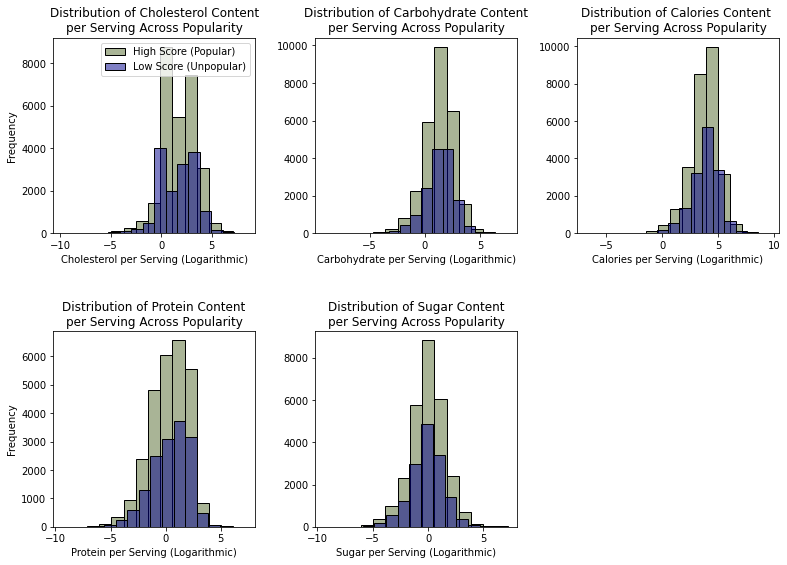

In [ ]:
# Creating a FacetGrid of Content distribution across Popularity (<-redo)
fig, axes = plt.subplots(2, 3, figsize = (13,9))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

sns.histplot(ax = axes[0,0], x = 'CholesterolContent_per_Serv_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0,0], x = 'CholesterolContent_per_Serv_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0,0].set_title("""Distribution of Cholesterol Content
per Serving Across Popularity""")
axes[0,0].set_xlabel('Cholesterol per Serving (Logarithmic)')
axes[0,0].set_ylabel('Frequency')

sns.histplot(ax = axes[0,1], x = 'CarbohydrateContent_per_Serv_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0,1], x = 'CarbohydrateContent_per_Serv_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0,1].set_title("""Distribution of Carbohydrate Content
per Serving Across Popularity""")
axes[0,1].set_xlabel('Carbohydrate per Serving (Logarithmic)')
axes[0,1].set_ylabel('')

sns.histplot(ax = axes[1,0], x = 'ProteinContent_per_Serv_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[1,0], x = 'ProteinContent_per_Serv_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[1,0].set_title("""Distribution of Protein Content
per Serving Across Popularity""")
axes[1,0].set_xlabel('Protein per Serving (Logarithmic)')
axes[1,0].set_ylabel('Frequency')

sns.histplot(ax = axes[1,1], x = 'SugarContent_per_Serv_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[1,1], x = 'SugarContent_per_Serv_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[1,1].set_title("""Distribution of Sugar Content
per Serving Across Popularity""")
axes[1,1].set_xlabel('Sugar per Serving (Logarithmic)')
axes[1,1].set_ylabel('')

sns.histplot(ax = axes[0,2], x = 'Calories_per_Serv_log', data = data[data['HighScore'] == 1],
                     bins = 15, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0,2], x = 'Calories_per_Serv_log', data = data[data['HighScore'] == 0],
                     bins = 15, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0,2].set_title("""Distribution of Calories Content 
per Serving Across Popularity""")
axes[0,2].set_xlabel('Calories per Serving (Logarithmic)')
axes[0,2].set_ylabel('')

axes[1,2].set_visible(False)

axes[0,0].legend()
plt.show() #More variability, makes more sense now

#### 2.3 Feature Engineering: % of Daily Value
In addition to the total content of the components in the recipe and their amount per Serving, we can also find **% of the Daily Value (per Serving)** in the <em>Nutrition Facts</em> table. This indicator may also be of interest to customers of this service. In this regard, it was decided to create new columns in the original dataset with the percentage of components relative to the daily intake.</p>
To do this, the following benchmarks were used, which are the standard for the industry: daily consumption of <code>Calories</code> - **2,000**; <code>Sugar</code> - **50 grams**; <code>Carbohydrates</code> - **275 grams**; <code>Protein</code> - **50 grams**; <code>Cholesterol</code> - **250 milligrams**.</p>
Based on the description of the recipes, including <code>Name</code> and <code>RecipeCategory</code>, it is difficult to say that any of the recipes is an example of supplementary products, that is, any vitamin complexes. In this regard, it was decided to attribute the content <em>over 100%</em> of the Daily Value to <code>100% DV</code>.

In [ ]:
# Calculating Content as a Percentage of a Daily Value (per Serving)
# Calories
data['Calories_DV'] = round(data['Calories'] / data['RecipeServings'] / 2000,2)
data['Calories_DV'] = [i if (i <= 1) else 1 for i in data['Calories_DV']] #not a supp product, if more than 100% of DV -> 100%

# Cholesterol
data['CholesterolContent_DV'] = round(data['CholesterolContent'] / data['RecipeServings'] / 250,2)
data['CholesterolContent_DV'] = [i if (i <= 1) else 1 for i in data['CholesterolContent_DV']]

# Carbohydrate
data['CarbohydrateContent_DV'] = round(data['CarbohydrateContent'] / data['RecipeServings'] / 275,2)
data['CarbohydrateContent_DV'] = [i if (i <= 1) else 1 for i in data['CarbohydrateContent_DV']]

# Sugar
data['SugarContent_DV'] = round(data['SugarContent'] / data['RecipeServings'] / 50,2)
data['SugarContent_DV'] = [i if (i <= 1) else 1 for i in data['SugarContent_DV']]

# Protein
data['ProteinContent_DV'] = round(data['ProteinContent'] / data['RecipeServings'] / 50,2)
data['ProteinContent_DV'] = [i if (i <= 1) else 1 for i in data['ProteinContent_DV']]

#### 2.3 New Features Investigation /% DV/ 
Visualizing the **% Daily Values of Components per Serving** on a scale of <code>0 to 100%</code>, most of the recipes are in the category of low-calorie recipes that do not contain a significant amount of <code>Carbohydrates, Proteins, Sugar,</code> and <code>Cholesterol</code>. At the same time, the distributions for popular and unpopular recipes are similar. They are strongly right-skewed due to the presence of meals containing a moderate daily amount of components.</p>
Analyzing <code>SugarContent</code> and <code>CarbohydrateContent</code>, it can be noted that the right tail of the distribution of <code>Sugar</code> is more elongated in relation to the <code>Carbohydrates</code>, of which it should be a part. While the pattern is broadly the same, it is also necessary to examine the proportion of sugar in carbohydrates to find out how valuable the percentage that carbohydrates consist of added sugar is to buyers.

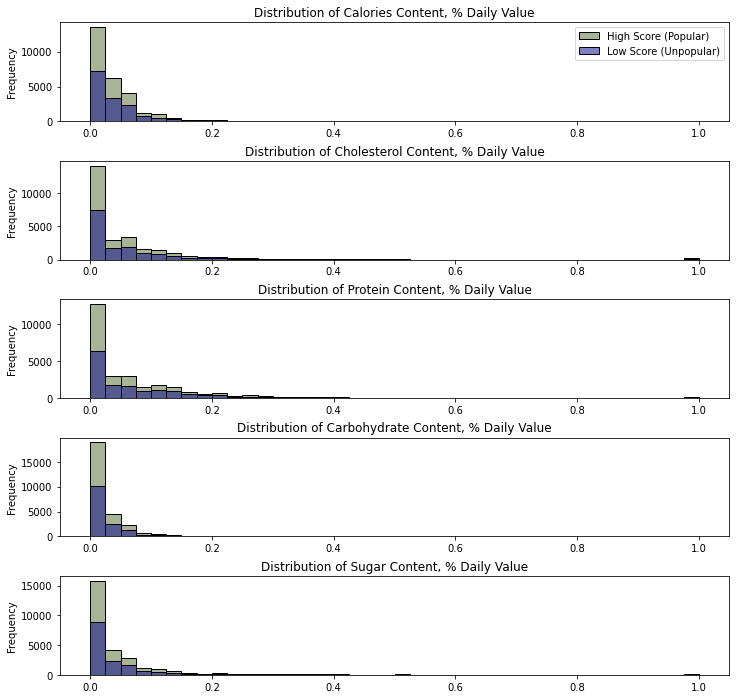

In [ ]:
# Creating subplots of Content distribution across Popularity
fig, axes = plt.subplots(5, 1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.4)

sns.histplot(ax = axes[1], x = 'CholesterolContent_DV', data = data[data['HighScore'] == 1],
                     bins = 40, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[1], x = 'CholesterolContent_DV', data = data[data['HighScore'] == 0],
                     bins = 40, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[1].set_title("""Distribution of Cholesterol Content, % Daily Value""")
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

sns.histplot(ax = axes[3], x = 'CarbohydrateContent_DV', data = data[data['HighScore'] == 1],
                     bins = 40, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[3], x = 'CarbohydrateContent_DV', data = data[data['HighScore'] == 0],
                     bins = 40, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[3].set_title("""Distribution of Carbohydrate Content, % Daily Value""")
axes[3].set_xlabel('')
axes[3].set_ylabel('Frequency')

sns.histplot(ax = axes[2], x = 'ProteinContent_DV', data = data[data['HighScore'] == 1],
                     bins = 40, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[2], x = 'ProteinContent_DV', data = data[data['HighScore'] == 0],
                     bins = 40, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[2].set_title("""Distribution of Protein Content, % Daily Value""")
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

sns.histplot(ax = axes[4], x = 'SugarContent_DV', data = data[data['HighScore'] == 1],
                     bins = 40, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[4], x = 'SugarContent_DV', data = data[data['HighScore'] == 0],
                     bins = 40, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[4].set_title("""Distribution of Sugar Content, % Daily Value""")
axes[4].set_xlabel('')
axes[4].set_ylabel('Frequency')

sns.histplot(ax = axes[0], x = 'Calories_DV', data = data[data['HighScore'] == 1],
                     bins = 40, color = 'darkolivegreen', label = 'High Score (Popular)', alpha = 0.5)
sns.histplot(ax = axes[0], x = 'Calories_DV', data = data[data['HighScore'] == 0],
                     bins = 40, color = 'darkblue', label = 'Low Score (Unpopular)', alpha = 0.5)
axes[0].set_title("""Distribution of Calories Content, % Daily Value""")
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

axes[0].legend()
plt.show() #More variability, makes more sense now

#### 2.4 New Feature Engineering and Investigation
In order to investigate the relationships between <code>Carbohydrates</code> and their constituent <code>Sugar</code>, we decided to use scatterplots. This will help to form a complete picture of what is happening, including how the recipes are formed in the original dataset. In doing so, the relationship between **absolute values, in grams**, and between **Carbohydrates in grams** and **Sugar as a percentage of Carbohydrates** was analyzed.</p>
We decided to use <em>jittering</em> for a better visual perception of a scatterplot. The standard deviation indicator was selected based on the best subjective perception of the graphs. Based on the outputs obtained, several key conclusions can be drawn:</p>
- No recipes are observed in which the Sugar content exceeds the volume of Carbohydrates, indicating no errors in the data in this section.</p></p>
- Based on the first graph, it can be noted that there are two main clusters of recipes: <code>(1)</code> meals with a low content of added Sugar and <code>(2)</code> recipes with a very high content of Sugar in relation to carbohydrates.</p></p>
- The second graph adds that meals are clustered into <code>(1)</code> recipes with <code>Carbohydrates</code> below **about 20 grams**, where the <code>Sugar</code> content varies **from 20% to 80%**, and <code>(2)</code> recipes with <code>Carbohydrates</code> **over 20 grams**, and where the <code>Sugar</code> content does **not exceed 20%**.</p>
There are probably two recipe types: **snacks-style** recipes to quickly replenish energy and improve mood with a bit of sugar stuffing, and **normal-style** recipes that focus on efficient eating without added Sugar. With this indicator, it will be possible to see how vital this information is for Tasty Bytes customers.

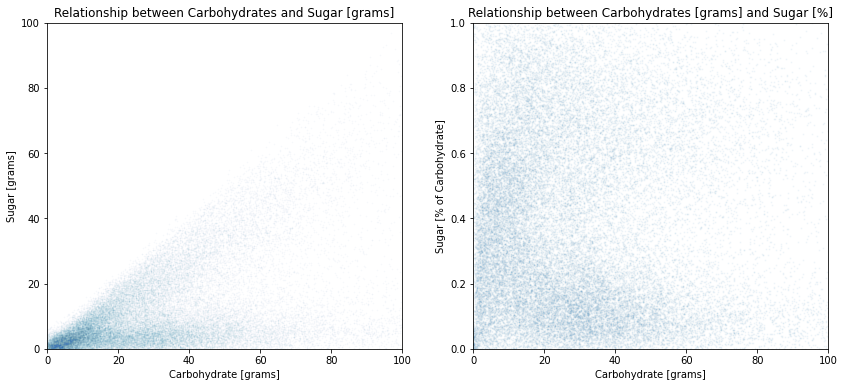

In [ ]:
# Relationship between Sugar and Carbohydrate Contents
# Jittering
Sugar_jitter = data['SugarContent'] + np.random.normal(0, 2, size = len(data))
Carbohydrate_jitter = data['CarbohydrateContent'] + np.random.normal(0, 0.2, size = len(data))

# Relationship between Carbohydrate (abs) and Sugar Percentage Content
data['SugarContent_perc'] = round(data['SugarContent'] / data['CarbohydrateContent'], 2)
data['SugarContent_perc'] = data['SugarContent_perc'].fillna(0) #filling NaN with 0 (no carbohydrates and sugar)

# Jittering
Sugar_perc_jitter = data['SugarContent_perc'] + np.random.normal(0, 0.05, size = len(data))

# Displaying
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(Carbohydrate_jitter, Sugar_jitter, 'o', markersize = 1, alpha = 0.02)
ax[0].axis ([0, 100, 0, 100])
ax[0].set_title('Relationship between Carbohydrates and Sugar [grams]')
ax[0].set_xlabel('Carbohydrate [grams]')
ax[0].set_ylabel('Sugar [grams]')


ax[1].plot(Carbohydrate_jitter, Sugar_perc_jitter, 'o', markersize = 1, alpha = 0.04)
ax[1].axis ([0, 100, 0, 1])
ax[1].set_title('Relationship between Carbohydrates [grams] and Sugar [%]')
ax[1].set_ylabel('Sugar [% of Carbohydrate]')
ax[1].set_xlabel('Carbohydrate [grams]')

plt.show()

#### 2.5 Feature Engineering and Investigation /dummy variables/
In addition, it seems possible that the customers may be interested in some specific products mentioned in the recipe's title. For example, <em>Chicken</em> may be more attractive to customers than <em>Rice</em>.</p>
We decided to consider the most popular words in more than **3%** of cases. With the help of <code>Counter</code>, we got a list of the most popular words used in the <code>Name</code> column and the number of such cases.</p>
Next, we created a user-defined function that produces a dummy variable if a particular word is present in the <code>Name</code>. Next, we used this function to create new columns in the original dataset using the eight most popular words. We didn't use words like <code>"and"</code>, <code>"with"</code> and <code>"&amp"</code> because we couldn't make any recommendations based on this information.

In [ ]:
# most common words used
split_it = " ".join(data['Name']).split()
counter = Counter(split_it)
most_occur = counter.most_common(15)
print(most_occur)

# Function for creating a dummy variable based on most common used words
def is_common_word(data, x, word):
    column = []
    for row in data[x]:
        if word in row:
            column.append(1) #if contains a word
        else:
            column.append(0) #if not
    return column

#Applying function
data['is_chicken'] = is_common_word(data, 'Name', 'Chicken') 		#1.if contains "Chicken" word
data['is_salad'] = is_common_word(data, 'Name', 'Salad') 			#2.if contains "Salad" word
data['is_soup'] = is_common_word(data, 'Name', 'Soup') 				#3.if contains "Soup" word
data['is_cheese'] = is_common_word(data, 'Name', 'Cheese') 			#4.if contains "Cheese" word
data['is_cake'] = is_common_word(data, 'Name', 'Cake') 				#5.if contains "Cake" word
data['is_chocolate'] = is_common_word(data, 'Name', 'Chocolate') 	#6.if contains "Chocolate" word
data['is_pie'] = is_common_word(data, 'Name', 'Pie') 				#7.if contains "Pie" word
data['is_cream'] = is_common_word(data, 'Name', 'Cream') 			#8.if contains "Cream" word 
#data['is_baked'] = is_common_word(data, 'Name', 'Baked') 			#9.if contains "Baked" word (less then 3%)


# Checking for the percentage of existing
#print(data['is_cream'].value_counts(normalize = True).sort_values(ascending = False))
#print(data['is_baked'].value_counts(normalize = True).sort_values(ascending = False)) #don't include

#Checking
#data.head(n = 5)

[('and', 5314), ('Chicken', 4810), ('With', 4318), ('Salad', 2530), ('Soup', 1784), ('Cheese', 1577), ('Sauce', 1539), ('Cake', 1396), ('Chocolate', 1383), ('Pie', 1152), ('&amp;', 1118), ('Cream', 1069), ('Baked', 1033), ('Rice', 1023), ('Pork', 1020)]


#### 2.5 Feature Engineering and Investigation /dummy variables/
We can also assume that customers may be interested in a specific <code>Category</code> of recipes, such as <code>Dessert</code> or <code>Breakfast</code>, and this is what can make a recipe popular. To include the relevant feature in the model, we figured out the most popular categories and created a dummy variable with a list comprehension for those categories. We didn't use the popular categories <code>Chicken Breast</code> and <code>Chicken</code< because we already have a dummy variable <code>is_chicken</code> derived from the recipe's <code>Name</code>. We also used the rule to include categories with **at least 3%** of observations.

In [ ]:
# Most common used Categories
print(data['RecipeCategory'].value_counts(normalize = True).sort_values(ascending = False).head(n = 10))

# Creating dummy variables with selected categories
data['is_dessert_cat'] = [1 if (i == 'Dessert') else 0 for i in data['RecipeCategory']]
data['is_lunch_cat'] = [1 if (i == 'Lunch/Snacks') else 0 for i in data['RecipeCategory']]
data['is_one_dish_meal_cat'] = [1 if (i == 'One Dish Meal') else 0 for i in data['RecipeCategory']]
data['is_veg_cat'] = [1 if (i == 'Vegetable') else 0 for i in data['RecipeCategory']]
data['is_breakfast_cat'] = [1 if (i == 'Breakfast') else 0 for i in data['RecipeCategory']]
data['is_bever_cat'] = [1 if (i == 'Beverages') else 0 for i in data['RecipeCategory']]

# Double checking compare to previous ratios
# data['is_bever_cat'].value_counts(normalize = True)

Dessert           0.098267
Lunch/Snacks      0.076155
One Dish Meal     0.067735
Vegetable         0.058218
Breakfast         0.045856
Beverages         0.039769
Chicken           0.032468
Chicken Breast    0.032305
Pork              0.027640
Meat              0.026497
Name: RecipeCategory, dtype: float64


### 3. Classification Model Development and Evaluation
#### 3.1 Developing a Basic Classification Model
We are dealing with a **Classification Problem** where the response variable is <code>HighScore</code>, and the features are potentially <code>Content of the meal</code> (in original and log form), <code>Content per Serving</code> (in log form), <code>Content as % Daily Value</code>, <code>Dummy Variables</code> of Top <code>Name</code> and Top <code>Category</code> and <code>RecipeServings</code>.</p>
- First, we selected the corresponding columns and subsetted them into two sets - response and features.</p></p>
- Second, we split the response and features datasets into **training** and **testing** sets, with a testing size of **20%**. For reproducibility, we pre-set <code>random.seed</code> with a value of 456. Since the two-dimensional shape is an essential input for some classification models, we <code>reshape</code> the y-variable.</p></p>
- Thirdly, we have created a <code>LogisticRegression</code> object to form a base model that will be the basis for further improvements. After that, we fit the model with <code>X_train</code> and <code>y_train data</code>.</p></p>
- Fourth, to evaluate this model, we predicted y-variables by absolute numbers, 1 and 0, and calculated the probability. Since we are dealing with a classification problem, the **confusion matrix** is crucial for us and, accordingly, indicators such as <code>precision, recall</code>, and <code>accuracy</code>, which we can calculate on our own or find using the <code>classification_report</code> function. After that, we visualize the <code>ROC Curve</code> to evaluate how this model is better than random guessing and quantify this impact by calculating ROC AUC Score by the <code>roc_auc_score</code> function.</p>
Analyzing the outputs of this model, this model is poor for the end-user for two reasons: **(1)** the <code>accuracy</code> of this model is low, and **(2)** the model predicts the high popularity of almost all recipes, which is a very poor criterion, especially from the point of view of the client's request to understand which products will not be popular.</p>
Based on this understanding, although <code>accuracy</code> is a important component, the following aspects are much more critical so that **(1)** actual 0 and predicted 0 are **as large as possible**, and **(2)** false positives are **as small as possible**. Of course, false negatives must be less, but this is not a guideline for this case since it is not so important how few the client will receive as how many customers and orders he can lose with unpopular recipes on the main page. It's better to have fewer popular recipes on the front page than many, with a high probability that some of them will not be attractive to customers.</p>
In addition, since we included all features in this model, we cannot say that all features are significant without conducting appropriate tests.

(34299, 31) (8575, 31) (34299, 1) (8575, 1)
[[   1 3041]
 [   0 5533]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      3042
         1.0       0.65      1.00      0.78      5533

    accuracy                           0.65      8575
   macro avg       0.82      0.50      0.39      8575
weighted avg       0.77      0.65      0.51      8575



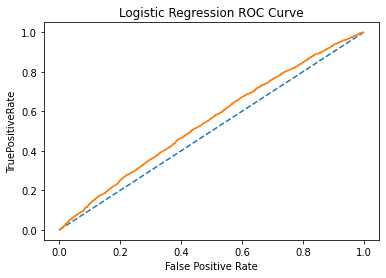

0.5480819583128804


In [ ]:
#----- Investigating a Basic model---------------------

#Setting up a random seed for reproducibility
np.random.seed(456)

#Splitting dataframe into Training and Testing sets
response = data['HighScore'].values
features_columns = ['Calories_log', 'CholesterolContent_log',
                    'CarbohydrateContent_log', 'SugarContent_log', 'ProteinContent_log',
                    'Calories_per_Serv_log', 'CholesterolContent_per_Serv_log',
                    'CarbohydrateContent_per_Serv_log', 'SugarContent_per_Serv_log',
                    'ProteinContent_per_Serv_log', 'Calories_DV', 'CholesterolContent_DV',
                    'CarbohydrateContent_DV', 'SugarContent_DV', 'ProteinContent_DV',
                    'SugarContent_perc', 'is_chicken', 'is_salad', 'is_soup', 'is_cheese',
                    'is_cake', 'is_chocolate', 'is_pie', 'is_cream', 
                    'is_dessert_cat', 'is_lunch_cat', 'is_one_dish_meal_cat',
                    'is_veg_cat', 'is_breakfast_cat', 'is_bever_cat', 'RecipeServings']
features = data[features_columns].values

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size = 0.2)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Logistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('TruePositiveRate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_probs))

#### 3.2 Feature Importance
Thus, we have concluded that we need to understand <code>Feature Importance</code> to leave only the response variable features that are significant for predicting the response. In addition to being essential for machine learning model development, it is primarily necessary for Tasty Bytes to form the right marketing strategy for presenting recipes on the main page of the site.</p>
In order to identify the most significant features, we created a <code>RandomForestClassifier</code> object, fitted it with training data, and created a <code>Series</code> with importance coefficients of the parameters included in the model. After that, we sorted the data and visualized it as a horizontal **barplot**.</p>
First, the presence of certain words in the <code>Name</code> and the assignment of recipes to a particular <code>Category</code> do not affect the recipe's popularity for buyers. In addition, the following variables have a negligible effect - <code>RecipeServings, Calories_DV, Calories_per_Serv_DV, Calories_log</code> and <code>CholesterolContent_DV</code>. That is, the calorie indicator in any of its forms practically does not affect the popularity of a particular recipe. In this regard, we decided not to include these parameters in modeling not to overfit the model.</p>
It is essential to say that **the most critical factors** for buyers are the total <code>Protein</code> content in the recipe, the <code>Protein per Serving</code> content, and <code>% of Daily Value</code>, as well as the proportion of <code>Sugar in Carbohydrates</code> and its total volume. That is, buyers are primarily focused on some version of the **Keto diet**, and perhaps this should be emphasized for further promotion of recipes.

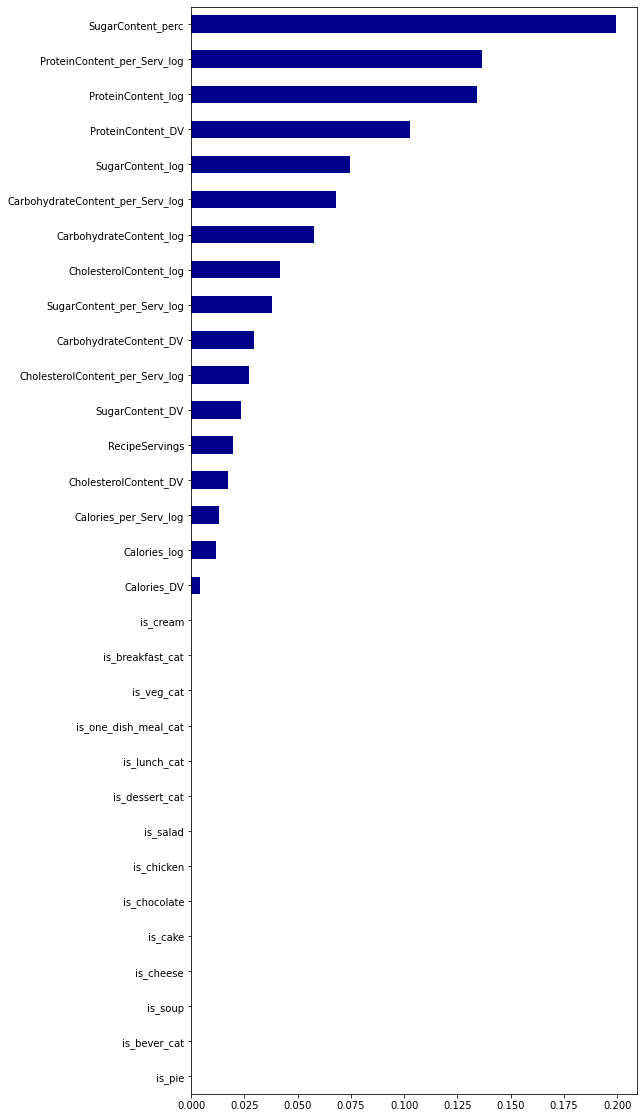

In [ ]:
# Feature Importance
rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 0.15)

rf.fit(X_train, y_train)

importances_rf = pd.Series(rf.feature_importances_,
                           index = features_columns)

sorted_importances_rf = importances_rf.sort_values()

fig, ax = plt.subplots(figsize = (8, 20))
sorted_importances_rf.plot(kind = 'barh', color = 'darkblue')
plt.show()

#### 3.3 Muptiple Classification Models Development
In order to form the best model for predicting the response variable, it is necessary to try out different models that solve the **Classification Problem**.</p>
To do this, we used five models: <code>Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier</code>, and <code>K-Neighbors Classifier</code>. To this end, we created the corresponding objects, like <code>LogisticRegression()</code>. For some models, we have also set specific parameters:</p>
- for <code>DecisionTreeClassifier</code> we set <code>max_depth</code> to 3.</p></p>
- for <code>RandomForestClassifier</code>, we defined a <code>number of estimators</code> as 400 and <code>min_samples_leaf</code> as 15%.</p></p>
- for <code>KNeighborsClassifier</code>, we initially set the <code>n_neighbors</code> level to 15, but after checking the training and testing accuracies, it was decided to substitute the value in **23 neighbors**.</p></p>
- for <code>GradientBoostingClassifier</code>, we have defined a <code>number of estimators</code> as 400 and <code>max_depth</code> with value 2.</p></p>
- In addition, we also used the <code>VotingClassifier</code> model to find the best solution based on the previously formed models.</p>
We split features and response variables into training and testing datasets and then fit models with training data. After that, we predict y-variables with testing data so that we can evaluate models compared to each other.</p>
As previously used, we compared model outputs based on **confusion_matrix** and **classification_report**, favoring high true negatives and small false positives. In addition, we looked at **RMSE** to minimize.
In addition, we visualized the <code>ROC Curves</code> of all models to determine which one provides the best predictions, which are different from random guessing.</p>
Analyzing the obtained outputs, we can say that <code>LogisticRegression</code> shows one of the highest comparative accuracies; however, the prediction of only <em>two unpopular</em> recipes concerning <em>more than 12,000 popular</em> ones indicates that the further use of this model is irrelevant for the formation of practical recommendations.
Similar results were presented by the <code>Decision Tree, Random Forest, Gradient Boosting models</code>, and respectively the <code>Voting Classifier</code> due to the significant dominant influence of the other models. Despite the relatively good results, we cannot use these models to predict the popularity of recipes effectively.</p>
Given the client's requests, the most appropriate classification model is **KNeighborsClassifier**. Accuracy scores are lower than other models, primarily because false negatives are much higher than other models. Despite this, it coincides with our guidelines - we will know exactly which recipes are unpopular (true negatives), and the percentage and an absolute number of recipes incorrectly identified as popular are lower than other models (precision). As we said earlier, it is essential to understand that the recipe on the main page is popular, which is much more critical than understanding which unpopular recipe is actually popular.</p>
Thus, we will use the KNeighborsClassifier model for further improvement with hyperparameter tuning.

#########################################
Logistic Regression Confusion Matrix: 
 [[   0 4562]
 [   2 8299]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4562
         1.0       0.65      1.00      0.78      8301

    accuracy                           0.65     12863
   macro avg       0.32      0.50      0.39     12863
weighted avg       0.42      0.65      0.51     12863

Logistic Regression RMSE:  0.596


#########################################
Decision Tree Confusion Matrix: 
 [[   1 4561]
 [   1 8300]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.00      0.00      4562
         1.0       0.65      1.00      0.78      8301

    accuracy                           0.65     12863
   macro avg       0.57      0.50      0.39     12863
weighted avg       0.59      0.65      0.51     12863

Decision Tree R

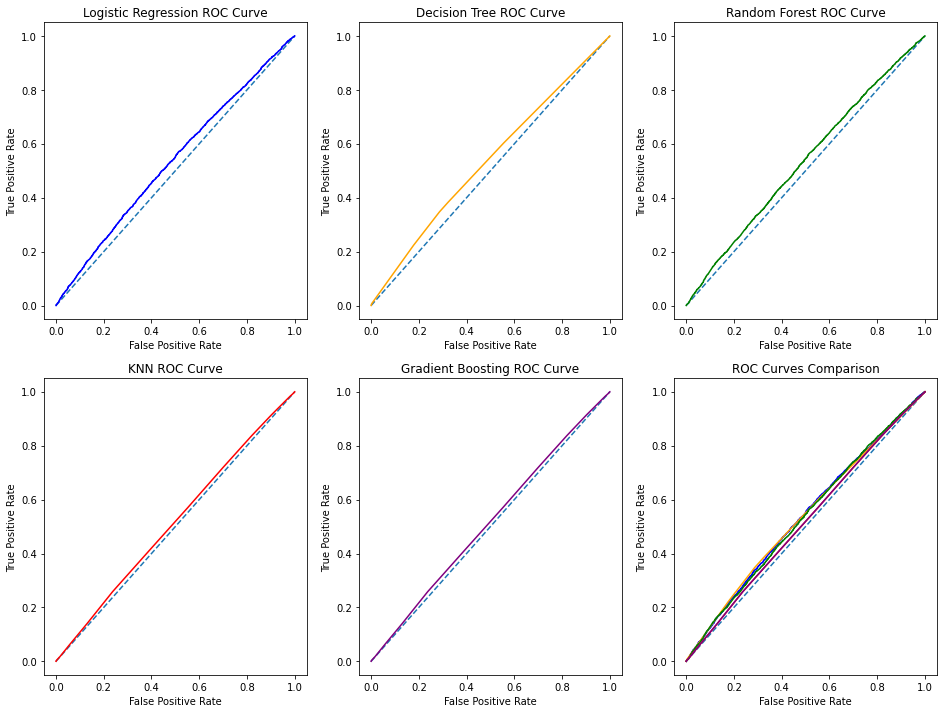

- Logistic Regression AUC   0.535
- Decision Tree AUC         0.535
- Random Forest AUC         0.532
- KNN AUC                   0.515
- Gradient Boosting AUC     0.541


In [ ]:
#Setting up a random seed for reproducibility
np.random.seed(456)

# Preprocessing before splitting response and features into training and testing datasets
response = data['HighScore'].values
features_columns = ['CholesterolContent_log',
                    'CarbohydrateContent_log', 'SugarContent_log', 'ProteinContent_log',
                    'CholesterolContent_per_Serv_log',
                    'CarbohydrateContent_per_Serv_log', 'SugarContent_per_Serv_log',
                    'ProteinContent_per_Serv_log', 
                    'ProteinContent_DV',
                    'SugarContent_perc']
features = data[features_columns].values

# Splitting dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size = 0.3) 
y_train = y_train.reshape(-1, 1)  #reshaping
y_test = y_test.reshape(-1, 1) 	  #reshaping
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #checking shapes

#-------------------------------------------------------------------------------
# Building a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting using Logistic Regression
y_pred_log = logreg.predict(X_test)
y_pred_probs_log = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_log))
print("Logistic Regression RMSE: ", round(MSE(y_test, y_pred_log) ** (1/2), 3))
print("\n")

#-------------------------------------------------------------------------------
# Building a Decision Tree
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

# Predicting using Decision Tree
y_pred_dt = dt.predict(X_test)
y_pred_probs_dt = dt.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report: \n", classification_report(y_test, y_pred_dt))
print("Decision Tree RMSE: ", round(MSE(y_test, y_pred_dt) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a Random Forest
rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 0.15)
rf.fit(X_train, y_train)

# Predicting using Random Forest
y_pred_rf = rf.predict(X_test)
y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Random Forest RMSE: ", round(MSE(y_test, y_pred_rf) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a KNeighborsClassifier
knn = KNN(n_neighbors = 23)
knn.fit(X_train, y_train)

# Predicting using KNeighborsClassifier
y_pred_knn = knn.predict(X_test)
y_pred_probs_knn = knn.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("KNeighborsClassifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("KNeighborsClassifier Classification Report: \n", classification_report(y_test, y_pred_knn))
print("KNeighborsClassifier RMSE: ", round(MSE(y_test, y_pred_knn) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a GradientBoostingClassifier
gbc = GBC(n_estimators = 400, max_depth = 2)
gbc.fit(X_train, y_train)

# Predicting using GradientBoostingClassifier
y_pred_gbc = gbc.predict(X_test)
y_pred_probs_gbc = gbc.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("Gradient Boosting Classifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gbc))
print("Gradient Boosting Classifier Classification Report: \n", classification_report(y_test, y_pred_gbc))
print("Gradient Boosting Classifier RMSE: ", round(MSE(y_test, y_pred_gbc) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
#Building a Voting Classifier
classifiers = [('Logistic Regression', logreg), ('Decision Tree', dt),
               ('Random Forest', rf), ('KNN', knn), ('Gradient Boosting', gbc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

# Predicting using GradientBoostingClassifier
y_pred_vc = vc.predict(X_test)

# Evaluation
print("#########################################")
print("Voting Classifier Classifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_vc))
print("Voting Classifier Classifier Classification Report: \n", classification_report(y_test, y_pred_vc))
print("Voting Classifier Classifier RMSE: ", round(MSE(y_test, y_pred_vc) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Plotting the ROC Curves
fig, ax = plt.subplots(2, 3, figsize = (16, 12))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_probs_log) 	#Logistic Regression
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_probs_dt) 		#Decision Tree
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf) 		#Random Forest
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_probs_knn) 	#KNN
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_probs_gbc) 	#Gradient Boosting

# Logistic Regression
ax[0,0].plot([0,1], [0,1], '--')
ax[0,0].plot(fpr_log, tpr_log, color = 'blue')
ax[0,0].set_xlabel('False Positive Rate')
ax[0,0].set_ylabel('True Positive Rate')
ax[0,0].set_title('Logistic Regression ROC Curve')

# Decision Tree
ax[0,1].plot([0,1], [0,1], '--')
ax[0,1].plot(fpr_dt, tpr_dt, color = 'orange')
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title('Decision Tree ROC Curve')

# Random Forest
ax[0,2].plot([0,1], [0,1], '--')
ax[0,2].plot(fpr_rf, tpr_rf, color = 'green')
ax[0,2].set_xlabel('False Positive Rate')
ax[0,2].set_ylabel('True Positive Rate')
ax[0,2].set_title('Random Forest ROC Curve')

# KNN 
ax[1,0].plot([0,1], [0,1], '--')
ax[1,0].plot(fpr_knn, tpr_knn, color = 'red')
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('KNN ROC Curve')

# Gradient Boosting Classifier 
ax[1,1].plot([0,1], [0,1], '--')
ax[1,1].plot(fpr_knn, tpr_knn, color = 'purple')
ax[1,1].set_xlabel('False Positive Rate')
ax[1,1].set_ylabel('True Positive Rate')
ax[1,1].set_title('Gradient Boosting ROC Curve')

# ALL
ax[1,2].plot([0,1], [0,1], '--')
ax[1,2].plot(fpr_log, tpr_log, color = 'blue')
ax[1,2].plot(fpr_dt, tpr_dt, color = 'orange')
ax[1,2].plot(fpr_rf, tpr_rf, color = 'green')
ax[1,2].plot(fpr_knn, tpr_knn, color = 'red')
ax[1,2].plot(fpr_knn, tpr_knn, color = 'purple')
ax[1,2].set_xlabel('False Positive Rate')
ax[1,2].set_ylabel('True Positive Rate')
ax[1,2].set_title('ROC Curves Comparison')
plt.show()

print(f"""- Logistic Regression AUC   {round(roc_auc_score(y_test, y_pred_probs_log),3)}
- Decision Tree AUC         {round(roc_auc_score(y_test, y_pred_probs_dt),3)}
- Random Forest AUC         {round(roc_auc_score(y_test, y_pred_probs_rf),3)}
- KNN AUC                   {round(roc_auc_score(y_test, y_pred_probs_knn),3)}
- Gradient Boosting AUC     {round(roc_auc_score(y_test, y_pred_probs_gbc),3)}""")

#### 3.3.1 KNeighborsClassifier n_neighbors Investigation
To better understand how many neighbors should be used to establish a **KNN** model, we created a graph comparing training and testing accuracies across knn models that were made with different numbers of <code>n_neighbors</code> and fitted with training data. This was done using a loop. The option with **23 neighbors** seems to be the best.</p>
Because this process is computationally expensive, we have commented out this code.

In [ ]:
# KNN n_neighbors plotting (commented out because of the high computational power)
# ## Looping accuracies
# train_accuracies = {}
# test_accuracies = {}
# neighbors = np.arange(1, 26)
# for neighbor in neighbors:
#     knn = KNN(n_neighbors = neighbor)
#     knn.fit(X_train, y_train)
#     train_accuracies[neighbor] = knn.score(X_train, y_train)
#     test_accuracies[neighbor] = knn.score(X_test, y_test)
    
# ## Plotting
# plt.figure(figsize = (8,6))
# plt.title('KNN: Varying Number of Neighbors')
# plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
# plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')
# plt.legend()
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.show()

### 3.3.2 Feature Importance
After that, we ensured that all the components included in the model were important using the <code>RandomForestClassifier</code>. It turned out that the percentage of <code>Sugar in Carbohydrates</code> is the most important for the new group of indicators, followed by <code>Protein Content<code>.

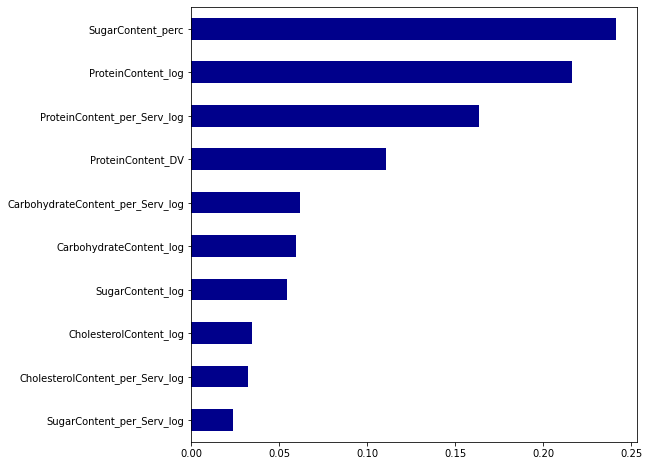

In [ ]:
# Feature Importance
importances_rf = pd.Series(rf.feature_importances_,
                           index = features_columns)

sorted_importances_rf = importances_rf.sort_values()

fig, ax = plt.subplots(figsize = (8, 8))
sorted_importances_rf.plot(kind = 'barh', color = 'darkblue')
plt.show()

#### 3.3.3 Scalling Testing
We also decided to test what happens to the results if we scale features using the <code>StandardScaler</code>. We did not find any significant changes when using this method. As a result of which, it was decided not to use it for the final model due to the unnecessary use of computational power.

#########################################
Logistic Regression Confusion Matrix: 
 [[   0 4562]
 [   2 8299]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4562
         1.0       0.65      1.00      0.78      8301

    accuracy                           0.65     12863
   macro avg       0.32      0.50      0.39     12863
weighted avg       0.42      0.65      0.51     12863

Logistic Regression RMSE:  0.596


#########################################
Decision Tree Confusion Matrix: 
 [[   1 4561]
 [   1 8300]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.00      0.00      4562
         1.0       0.65      1.00      0.78      8301

    accuracy                           0.65     12863
   macro avg       0.57      0.50      0.39     12863
weighted avg       0.59      0.65      0.51     12863

Decision Tree R

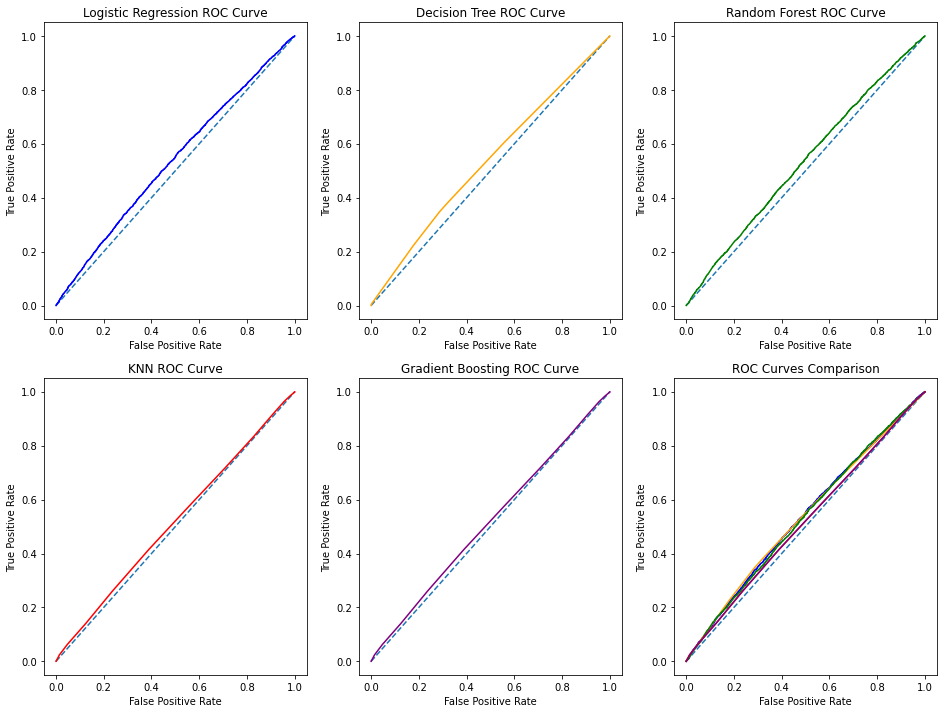

- Logistic Regression AUC   0.535
- Decision Tree AUC         0.535
- Random Forest AUC         0.532
- KNN AUC                   0.516
- Gradient Boosting AUC     0.541


In [ ]:
#----THE SAME WITH SCALING------------------

#Setting up a random seed for reproducibility
np.random.seed(456)

# Preprocessing before splitting response and features into training and testing datasets
response = data['HighScore'].values
features_columns = ['CholesterolContent_log',
                    'CarbohydrateContent_log', 'SugarContent_log', 'ProteinContent_log',
                    'CholesterolContent_per_Serv_log',
                    'CarbohydrateContent_per_Serv_log', 'SugarContent_per_Serv_log',
                    'ProteinContent_per_Serv_log', 
                    'ProteinContent_DV',
                    'SugarContent_perc']
features = data[features_columns].values

# Splitting dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size = 0.3) 
y_train = y_train.reshape(-1, 1)  #reshaping
y_test = y_test.reshape(-1, 1) 	  #reshaping
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #checking shapes

# Instantiating a Scalling transformator
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#-------------------------------------------------------------------------------
# Building a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting using Logistic Regression
y_pred_log = logreg.predict(X_test_scaled)
y_pred_probs_log = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("#########################################")
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_log))
print("Logistic Regression RMSE: ", round(MSE(y_test, y_pred_log) ** (1/2), 3))
print("\n")

#-------------------------------------------------------------------------------
# Building a Decision Tree
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train_scaled, y_train)

# Predicting using Decision Tree
y_pred_dt = dt.predict(X_test_scaled)
y_pred_probs_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("#########################################")
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report: \n", classification_report(y_test, y_pred_dt))
print("Decision Tree RMSE: ", round(MSE(y_test, y_pred_dt) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a Random Forest
rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 0.15)
rf.fit(X_train_scaled, y_train)

# Predicting using Random Forest
y_pred_rf = rf.predict(X_test_scaled)
y_pred_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("#########################################")
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Random Forest RMSE: ", round(MSE(y_test, y_pred_rf) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a KNeighborsClassifier
knn = KNN(n_neighbors = 23)
knn.fit(X_train_scaled, y_train)

# Predicting using KNeighborsClassifier
y_pred_knn = knn.predict(X_test_scaled)
y_pred_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("#########################################")
print("KNeighborsClassifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("KNeighborsClassifier Classification Report: \n", classification_report(y_test, y_pred_knn))
print("KNeighborsClassifier RMSE: ", round(MSE(y_test, y_pred_knn) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Building a GradientBoostingClassifier
gbc = GBC(n_estimators = 400, max_depth = 2)
gbc.fit(X_train_scaled, y_train)

# Predicting using GradientBoostingClassifier
y_pred_gbc = gbc.predict(X_test_scaled)
y_pred_probs_gbc = gbc.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("#########################################")
print("Gradient Boosting Classifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gbc))
print("Gradient Boosting Classifier Classification Report: \n", classification_report(y_test, y_pred_gbc))
print("Gradient Boosting Classifier RMSE: ", round(MSE(y_test, y_pred_gbc) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
#Building a Voting Classifier
classifiers = [('Logistic Regression', logreg), ('Decision Tree', dt),
               ('Random Forest', rf), ('KNN', knn), ('Gradient Boosting', gbc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train_scaled, y_train)

# Predicting using GradientBoostingClassifier
y_pred_vc = vc.predict(X_test_scaled)

# Evaluation
print("#########################################")
print("Voting Classifier Classifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_vc))
print("Voting Classifier Classifier Classification Report: \n", classification_report(y_test, y_pred_vc))
print("Voting Classifier Classifier RMSE: ", round(MSE(y_test, y_pred_vc) ** (1/2),3))
print("\n")

#-------------------------------------------------------------------------------
# Plotting the ROC Curves
fig, ax = plt.subplots(2, 3, figsize = (16, 12))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_probs_log) 	#Logistic Regression
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_probs_dt) 		#Decision Tree
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf) 		#Random Forest
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_probs_knn) 	#KNN
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_probs_gbc) 	#Gradient Boosting

# Logistic Regression
ax[0,0].plot([0,1], [0,1], '--')
ax[0,0].plot(fpr_log, tpr_log, color = 'blue')
ax[0,0].set_xlabel('False Positive Rate')
ax[0,0].set_ylabel('True Positive Rate')
ax[0,0].set_title('Logistic Regression ROC Curve')

# Decision Tree
ax[0,1].plot([0,1], [0,1], '--')
ax[0,1].plot(fpr_dt, tpr_dt, color = 'orange')
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title('Decision Tree ROC Curve')

# Random Forest
ax[0,2].plot([0,1], [0,1], '--')
ax[0,2].plot(fpr_rf, tpr_rf, color = 'green')
ax[0,2].set_xlabel('False Positive Rate')
ax[0,2].set_ylabel('True Positive Rate')
ax[0,2].set_title('Random Forest ROC Curve')

# KNN 
ax[1,0].plot([0,1], [0,1], '--')
ax[1,0].plot(fpr_knn, tpr_knn, color = 'red')
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('KNN ROC Curve')

# Gradient Boosting Classifier 
ax[1,1].plot([0,1], [0,1], '--')
ax[1,1].plot(fpr_knn, tpr_knn, color = 'purple')
ax[1,1].set_xlabel('False Positive Rate')
ax[1,1].set_ylabel('True Positive Rate')
ax[1,1].set_title('Gradient Boosting ROC Curve')

# ALL
ax[1,2].plot([0,1], [0,1], '--')
ax[1,2].plot(fpr_log, tpr_log, color = 'blue')
ax[1,2].plot(fpr_dt, tpr_dt, color = 'orange')
ax[1,2].plot(fpr_rf, tpr_rf, color = 'green')
ax[1,2].plot(fpr_knn, tpr_knn, color = 'red')
ax[1,2].plot(fpr_knn, tpr_knn, color = 'purple')
ax[1,2].set_xlabel('False Positive Rate')
ax[1,2].set_ylabel('True Positive Rate')
ax[1,2].set_title('ROC Curves Comparison')
plt.show()

print(f"""- Logistic Regression AUC   {round(roc_auc_score(y_test, y_pred_probs_log),3)}
- Decision Tree AUC         {round(roc_auc_score(y_test, y_pred_probs_dt),3)}
- Random Forest AUC         {round(roc_auc_score(y_test, y_pred_probs_rf),3)}
- KNN AUC                   {round(roc_auc_score(y_test, y_pred_probs_knn),3)}
- Gradient Boosting AUC     {round(roc_auc_score(y_test, y_pred_probs_gbc),3)}""")

### 4. Best Model Development
#### 4.1 Hyperparameter Tuning
So after we have chosen KNeighborsModel as our final model, we need to optimize it with hyperparameter tuning. For this, we used <code>RandomizedSearchCV</code>. The following parameters of the <code>KNN</code> model were taken as the parameter grid: <code>weights, algorithm, metric,</code> and <code>n_neighbors</code>. **Precision Score** was chosen as our target to increase the percentage of recipes predicted as popular and turned out to be attractive.</p>
With the help of <code>KFold</code> and a defined <code>param_grid</code>, we could determine the best values of predefined parameters we could insert into our final model.</p>
Because this process is computationally expensive, we have commented out this code.

In [ ]:
# # Hyperparameter tunning to KNN model (commented out)
# kf = KFold(n_splits = 100, shuffle = True, random_state = 456)
# param_grid = {'weights' : ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'metric' : ['minkowski', 'euclidean', 'manhattan'],
#               'n_neighbors' : [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]}
# knn_hyp = KNN()
# knn_cv = RandomizedSearchCV(knn_hyp, param_grid, cv = kf, n_iter = 20, scoring = 'precision')

# knn_cv.fit(X_train, y_train)
# print(knn_cv.best_params_, knn_cv.best_score_)

# #Output: ==> {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'minkowski', 'algorithm': 'auto'} 0.6509676545857639

#### 4.2 Best Model
Thus, we got the best classification model, which is in the interests of Tasty Bytes. In the case of using the model to identify popular recipes, there is a **27%** chance <em>(precision from the classification_report)</em> that the recipe will be unpopular, which is almost the same as the model Tasty Bytes is using now. In this regard, we recommend using both models to form an informed decision about what is considered a popular dish.</p>
Speaking about the factors that turned out to be significant for predicting <code>HighScore</code>, it should be noted in general that, most likely, the aspects of food composition and its names are not precisely the drivers that determine the popularity of a particular dish. It's also likely that there are factors of where a particular recipe is located on the main page of the site, or the quality of the photo of the dish prepared using the recipe, or the price factor. It is probably worth taking a closer look at these data and trying to implement them in the model in the future to obtain more accurate results.</p>
In addition, based on the results obtained, it seems that the primary buyers of the service prefer recipes from the keto diet; that is, they emphasize the content of added sugar and the amount of protein, both in total volume and per Serving and % Daily Value. If such information is not presented on the site, it may also be worth introducing it and looking at how this will affect the popularity of a particular recipe.

#########################################
KNeighborsClassifier Confusion Matrix: 
 [[1221 3341]
 [2133 6168]]
KNeighborsClassifier Classification Report: 
               precision    recall  f1-score   support

         0.0       0.36      0.27      0.31      4562
         1.0       0.65      0.74      0.69      8301

    accuracy                           0.57     12863
   macro avg       0.51      0.51      0.50     12863
weighted avg       0.55      0.57      0.56     12863

KNeighborsClassifier RMSE:  0.652


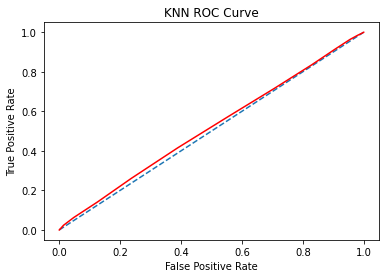

In [ ]:
#------Final Model----------

#Setting up a random seed for reproducibility
np.random.seed(456)

# Preprocessing before splitting response and features into training and testing datasets
response = data['HighScore'].values
features_columns = ['CholesterolContent_log',
                    'CarbohydrateContent_log', 'SugarContent_log', 'ProteinContent_log',
                    'CholesterolContent_per_Serv_log',
                    'CarbohydrateContent_per_Serv_log', 'SugarContent_per_Serv_log',
                    'ProteinContent_per_Serv_log', 
                    'ProteinContent_DV',
                    'SugarContent_perc']
features = data[features_columns].values

# Splitting dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size = 0.3) 
y_train = y_train.reshape(-1, 1)  #reshaping
y_test = y_test.reshape(-1, 1)    #reshaping

# Building a KNeighborsClassifier
knn = KNN(n_neighbors = 10, weights = 'uniform', metric = 'minkowski', algorithm = 'auto')
knn.fit(X_train, y_train)

# Predicting using KNeighborsClassifier
y_pred_knn = knn.predict(X_test)
y_pred_probs_knn = knn.predict_proba(X_test)[:, 1]

# Evaluation
print("#########################################")
print("KNeighborsClassifier Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("KNeighborsClassifier Classification Report: \n", classification_report(y_test, y_pred_knn))
print("KNeighborsClassifier RMSE: ", round(MSE(y_test, y_pred_knn) ** (1/2),3))
 
# KNN Plot
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], '--')
ax.plot(fpr_knn, tpr_knn, color = 'red')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('KNN ROC Curve')
plt.show()